In [1]:
import os 
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [2]:
index = ['sto_vol_all',
         'sto_vol_twt',
         'sto_rea_all',
         'sto_rea_twt',
         'sto_si1_all', 
         'sto_si2_all', 
         'sto_si3_all', 
         'sto_si1_twt', 
         'sto_si2_twt', 
         'sto_si3_twt',
         'stw_vol_dcl',
         'stw_vol_brt',
         'stw_si1_dcl',
         'stw_si2_dcl',
         'stw_si3_dcl', 
         'stw_si1_brt', 
         'stw_si2_brt',
         'stw_si3_brt']

In [3]:
sc = pd.DataFrame(np.zeros((18, 4)), index=index, columns=['btc', 'eth', 'aapl', 'spx'])
for i, file in enumerate(os.listdir('data/pred/')):
    _, source, type1, type2, symbol = file.split('.')[0].split('_')
    
    if type2 == 'fbp' or type1 == 'fbp':
        continue
        
    new = source + '_' + type1 + '_' + type2
    if type2.startswith('si'):
        new = source + '_' + type2 + '_' + type1

    data = pd.read_csv('data/pred/' + file, index_col=0)
    prices = pd.read_csv('data/prices/' + symbol + '_prices.csv', header=None, index_col=0)
    prices_sh = prices.shift(1)
    prices_sh.iloc[0] = prices.values[0]
    prices = np.log(prices / prices_sh)

    corr = pearsonr(data.values.ravel(), prices.values.ravel()) 
    sc.loc[new, symbol] = corr[0]

In [4]:
sc.round(2)

,btc,eth,aapl,spx
sto_vol_all,0.15,-0.02,-0.04,-0.01
sto_vol_twt,0.13,-0.02,0.01,-0.00
sto_rea_all,0.11,-0.07,-0.05,0.02
sto_rea_twt,0.09,-0.05,-0.06,0.02
sto_si1_all,0.02,0.09,0.08,0.03
sto_si2_all,0.03,0.09,0.07,0.04
sto_si3_all,-0.01,0.04,0.04,0.01
sto_si1_twt,-0.02,0.09,0.13,0.07
sto_si2_twt,-0.02,0.09,0.13,0.08
sto_si3_twt,-0.02,0.05,0.08,0.02


In [5]:
sc['avg'] = sc.apply(lambda x: x.abs().mean(), axis=1)

In [6]:
sc.round(2)

,btc,eth,aapl,spx,avg
sto_vol_all,0.15,-0.02,-0.04,-0.01,0.05
sto_vol_twt,0.13,-0.02,0.01,-0.00,0.04
sto_rea_all,0.11,-0.07,-0.05,0.02,0.06
sto_rea_twt,0.09,-0.05,-0.06,0.02,0.06
sto_si1_all,0.02,0.09,0.08,0.03,0.05
sto_si2_all,0.03,0.09,0.07,0.04,0.06
sto_si3_all,-0.01,0.04,0.04,0.01,0.02
sto_si1_twt,-0.02,0.09,0.13,0.07,0.07
sto_si2_twt,-0.02,0.09,0.13,0.08,0.08
sto_si3_twt,-0.02,0.05,0.08,0.02,0.04


In [7]:
sc.sort_values('avg', ascending=False)

,btc,eth,aapl,spx,avg
stw_si1_brt,0.511397,0.455196,0.502458,0.467887,0.484235
stw_si2_brt,0.515540,0.446281,0.492977,0.455123,0.477480
stw_si3_brt,0.468058,0.453679,0.488895,0.470912,0.470386
stw_si2_dcl,0.508514,0.394091,0.486323,0.423426,0.453089
stw_si1_dcl,0.503334,0.383174,0.488823,0.427046,0.450594
stw_si3_dcl,0.504943,0.357229,0.422462,0.453313,0.434487
stw_vol_dcl,0.123493,0.083931,-0.144190,-0.170401,0.130504
stw_vol_brt,0.052397,-0.027586,-0.175681,-0.215511,0.117794
sto_si2_twt,-0.021294,0.086011,0.128251,0.080759,0.079079
sto_si1_twt,-0.018398,0.086094,0.128271,0.066002,0.074691


In [8]:
from plotly.offline import iplot
from plotly import tools as tls
from plotly import graph_objs as go
import cufflinks as cf
cf.go_offline()

In [9]:
a = (sc['avg']).sort_values(ascending=False)

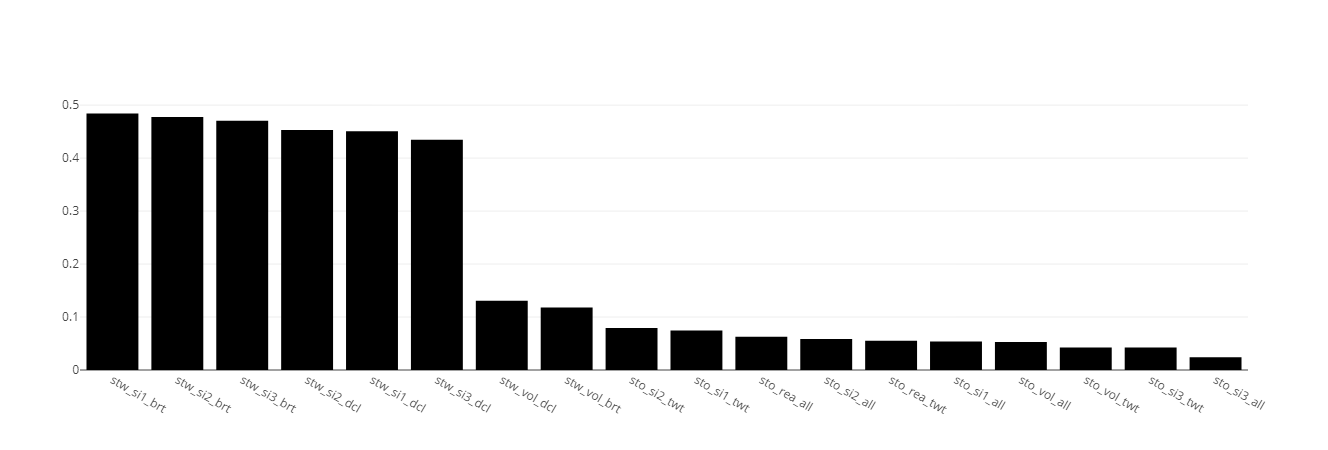

In [10]:
fig = go.Figure()
fig.add_trace(go.Bar(x=a.index, y=a, marker_color='rgb(0,0,0)', orientation='v'))
iplot(fig)